# Mobility Patterns and Edge–Fog–Cloud Deployment Costs – Skeleton Notebook (Student)

This notebook is a **skeleton**. It contains the structure, section titles and high-level tasks, but almost no code.

Your job is to:
- Load and integrate the AllGre datasets.
- Identify mobility patterns using clustering.
- Define edge–fog–cloud deployment architectures.
- Compute and compare their economic costs.

Use the handout for detailed instructions, assumptions, and formulas.

## 1. Imports and global parameters

In [2]:
# TODO: import all libraries you need
# Example: pyreadr, pandas, numpy, matplotlib, sklearn (StandardScaler, KMeans, ...)
!pip install pyreadr
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# TODO: optionally define global parameters (e.g., REQUESTS_MULTIPLIER)
# REQUESTS_MULTIPLIER = 10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.2/776.2 kB 11.6 MB/s eta 0:00:00


## 2. Loading and integrating the AllGre datasets

**Goal:**
- Load the three RData files: `allgreD.RData`, `allgreI.RData`, `allgreM.RData`.
- Convert each to a pandas DataFrame.
- Integrate them into a single table `df` (e.g., by column-wise concatenation or by merging on a key).

**Tasks:**
1. If you are in Colab, upload the three files.
2. Use `pyreadr.read_r` to load each file.
3. Extract the main object from each result.
4. Build a single integrated DataFrame `df`.
5. Inspect the result with `df.shape`, `df.head()`.

In [5]:
# TODO: upload the RData files if needed (Colab) and load them with pyreadr
resultD = pyreadr.read_r('allgreD.RData')
dfD = next(iter(resultD.values()))

# TODO: repeat for I and M
resultI = pyreadr.read_r('allgreI.RData')
dfI = next(iter(resultI.values()))

resultM = pyreadr.read_r('allgreM.RData')
dfM = next(iter(resultM.values()))

# TODO: integrate dfD, dfI, dfM into one DataFrame df
df = pd.concat([dfD, dfI, dfM], axis=1)

# TODO: basic inspection of df
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29148 entries, 0 to 29147
Columns: 135 entries, tir to btt2
dtypes: category(1), float64(43), int32(3), object(88)
memory usage: 29.5+ MB


,tir,NO_MEN,NO_PERS,NO_DEPL,zoneres.x.1,motifor,motoracc,zoneorig,heuredep,mindep,...,NB_velo,NB_2Rm,COEF_MNG,id_men,id_pers,id_depl,id_traj,nb_pers,nbt2,btt2
count,29148.000000,29148.000000,29148.000000,29148.000000,27890.0,27890.0,2711.0,27890.0,27890.0,27890.0,...,3236.000000,3236.000000,3236.000000,3236.000000,3.236000e+03,3.236000e+03,2.251000e+03,3236.000000,2809.000000,2809.0
unique,NaN,NaN,NaN,NaN,31.0,31.0,24.0,546.0,24.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.0
top,NaN,NaN,NaN,NaN,1.0,1.0,22.0,101001.0,16.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
freq,NaN,NaN,NaN,NaN,9060.0,10452.0,976.0,566.0,2967.0,7667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0
mean,324.372959,74.962330,1.885618,3.182929,NaN,NaN,NaN,NaN,NaN,NaN,...,1.711372,3.966625,46.281900,315223.941595,3.152239e+08,3.152239e+09,3.127999e+11,2.399876,0.863297,NaN
std,233.127137,82.225375,1.054956,2.367848,NaN,NaN,NaN,NaN,NaN,NaN,...,1.740367,21.286740,30.933656,233859.231238,2.338592e+08,2.338592e+09,2.266020e+11,1.277381,0.512489,NaN
min,101.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,6.429000,101012.000000,1.010120e+08,1.010120e+09,1.010180e+11,1.000000,0.000000,NaN
25%,125.000000,32.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,23.594000,122071.000000,1.220710e+08,1.220710e+09,1.230505e+11,1.000000,1.000000,NaN
50%,301.000000,62.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,40.008500,203078.500000,2.030785e+08,2.030785e+09,2.040260e+11,2.000000,1.000000,NaN
75%,507.000000,97.000000,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,0.000000,61.311000,506055.500000,5.060555e+08,5.060555e+09,5.060730e+11,3.000000,1.000000,NaN


## 3. Exploring and selecting mobility features

**Goal:**
- Understand the structure of `df`.
- Select a set of numeric columns that can be interpreted as *mobility-related features*.

**Tasks:**
1. List numeric and categorical columns.
2. From the numeric ones, choose 2–6 columns that make sense for mobility analysis (distances, times, counts, etc.).
3. Store the names of these columns in a Python list, e.g. `mobility_features = [...]`.
4. Justify your choice in a short markdown cell.

In [7]:
# TODO: identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

# TODO: choose the mobility_features list based on your understanding of the dataset
mobility_features = [
    "D13",
    "NO_DEPL",
    "Couteff"
]

['tir', 'NO_MEN', 'NO_PERS', 'NO_DEPL', 'D13', 'NO_TRAJ', 'id_men', 'id_pers', 'id_depl', 'id_traj', 'Couteff', 'UN', 'DEST', 'ORIG', 'tir', 'NO_MEN', 'NO_PERS', 'zoneres.y', 'sexe', 'lien', 'age', 'id_men', 'id_pers', 'nbd', 'UN', 'cspgroup', 'tir', 'NO_MEN', 'zoneres.x', 'jourdepl', 'TYPE_HAB', 'TYPE_OCU', 'Gare2', 'Gare5', 'telefon', 'internet', 'VP_DISPO', 'NB_velo', 'NB_2Rm', 'COEF_MNG', 'id_men', 'id_pers', 'id_depl', 'id_traj', 'nb_pers', 'nbt2']


## 4. Clustering to identify mobility patterns

**Goal:**
- Use k-means (or another clustering method) to identify a small number of mobility profiles.

**Tasks:**
1. Build a feature matrix `X` by selecting `mobility_features` from `df` and handling missing values.
2. Standardise the features (e.g. with `StandardScaler`).
3. Run k-means with 3–5 clusters (your choice) and obtain a `cluster` label for each row.
4. Compute and inspect cluster sizes.
5. Compute average values of each mobility feature by cluster.
6. Interpret the clusters in a markdown cell.

In [8]:
# TODO: build the feature matrix X and handle missing values (e.g. drop NA rows)
X = df[mobility_features].dropna()

# TODO: standardise X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# TODO: run k-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# TODO: attach cluster labels to X (or to a copy of df)
X_clustered = X.copy()
X_clustered['cluster'] = clusters

# TODO: compute cluster sizes and summary statistics
print(X_clustered['cluster'].value_counts())
cluster_summary = X_clustered.groupby('cluster')[mobility_features].mean()
cluster_summary

cluster
0    15253
1     4947
2     2196
Name: count, dtype: int64


,D13,NO_DEPL,Couteff
cluster,,,
0,3.670899,2.337507,0.565466
1,3.468673,6.751162,0.631458
2,27.981867,2.770492,5.022311


**Write here your interpretation of the clusters** (one short paragraph per cluster).

**Cluster 0 – Short and low-cost mobility**\
People in this cluster travel short distances and make a small number of trips. The cost is very low, which suggests local movements inside Grenoble, such as daily activities close to home.\
**Cluster 1 – Many short trips**\
This cluster shows a high number of trips but still short distances. The cost remains low. It represents people who move a lot during the day but mainly inside the city area.\
**Cluster 2 – Long and expensive trips**\
People in this cluster travel long distances with a moderate number of trips. The cost is much higher, which suggests long commutes, possibly from outside Grenoble, often using cars.

## 5. Edge–fog–cloud deployment architectures

**Goal:**
- Define a small synthetic dataset describing several deployment architectures for the mobility analytics pipeline.

**Tasks:**
1. From the handout, define at least three architectures (e.g. `edge_heavy`, `balanced`, `cloud_heavy`).
2. For each architecture and for each layer (`edge`, `fog`, `cloud`), specify:
   - number of devices,
   - power (watts),
   - hours per day active,
   - electricity price (EUR/kWh),
   - CAPEX per device and lifetime,
   - cloud cost per hour and hours per day (for cloud layer).
3. Build a list of Python dictionaries and convert it into a pandas DataFrame called `df_arch`.

In [9]:
# TODO: define a list of dictionaries for your deployment architectures
data_arch = [
          # Edge-heavy architecture
          {
              'architecture': 'edge_heavy', 'layer': 'edge',
              'n_devices': 2300, 'power_watts': 4.5, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.19, 'emission_factor_kg_per_kwh': 0.24,
              'capex_eur_per_device': 130, 'lifetime_years': 4,
              'cloud_cost_eur_per_hour': 0.0, 'cloud_hours_per_day': 0.0
          },
          {
              'architecture': 'edge_heavy', 'layer': 'fog',
              'n_devices': 55, 'power_watts': 170, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.17, 'emission_factor_kg_per_kwh': 0.29,
              'capex_eur_per_device': 1650, 'lifetime_years': 5,
              'cloud_cost_eur_per_hour': 0.0, 'cloud_hours_per_day': 0.0
          },
          {
              'architecture': 'edge_heavy', 'layer': 'cloud',
              'n_devices': 3, 'power_watts': 280, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.15, 'emission_factor_kg_per_kwh': 0.19,
              'capex_eur_per_device': 0, 'lifetime_years': 1,
              'cloud_cost_eur_per_hour': 0.38, 'cloud_hours_per_day': 6
          },


          # Balanced architecture
          {
              'architecture': 'balanced', 'layer': 'edge',
              'n_devices': 1700, 'power_watts': 2.5, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.18, 'emission_factor_kg_per_kwh': 0.25,
              'capex_eur_per_device': 95, 'lifetime_years': 4,
              'cloud_cost_eur_per_hour': 0.0, 'cloud_hours_per_day': 0.0
          },
          {
              'architecture': 'balanced', 'layer': 'fog',
              'n_devices': 100, 'power_watts': 220, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.16, 'emission_factor_kg_per_kwh': 0.30,
              'capex_eur_per_device': 2100, 'lifetime_years': 5,
              'cloud_cost_eur_per_hour': 0.0, 'cloud_hours_per_day': 0.0
          },
          {
              'architecture': 'balanced', 'layer': 'cloud',
              'n_devices': 6, 'power_watts': 320, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.14, 'emission_factor_kg_per_kwh': 0.20,
              'capex_eur_per_device': 0, 'lifetime_years': 1,
              'cloud_cost_eur_per_hour': 0.36, 'cloud_hours_per_day': 14
          },


          # Cloud-heavy architecture
          {
              'architecture': 'cloud_heavy', 'layer': 'edge',
              'n_devices': 900, 'power_watts': 1.5, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.18, 'emission_factor_kg_per_kwh': 0.25,
              'capex_eur_per_device': 55, 'lifetime_years': 4,
              'cloud_cost_eur_per_hour': 0.0, 'cloud_hours_per_day': 0.0
          },
          {
              'architecture': 'cloud_heavy', 'layer': 'fog',
              'n_devices': 30, 'power_watts': 120, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.16, 'emission_factor_kg_per_kwh': 0.30,
              'capex_eur_per_device': 1300, 'lifetime_years': 5,
              'cloud_cost_eur_per_hour': 0.0, 'cloud_hours_per_day': 0.0
          },
          {
              'architecture': 'cloud_heavy', 'layer': 'cloud',
              'n_devices': 10, 'power_watts': 400, 'hours_per_day_active': 24,
              'energy_price_eur_per_kwh': 0.14, 'emission_factor_kg_per_kwh': 0.20,
              'capex_eur_per_device': 0, 'lifetime_years': 1,
              'cloud_cost_eur_per_hour': 0.42, 'cloud_hours_per_day': 22
          }

]

# TODO: create df_arch = pd.DataFrame(data_arch)
df_arch = pd.DataFrame(data_arch)
df_arch.head()

,architecture,layer,n_devices,power_watts,hours_per_day_active,energy_price_eur_per_kwh,emission_factor_kg_per_kwh,capex_eur_per_device,lifetime_years,cloud_cost_eur_per_hour,cloud_hours_per_day
0,edge_heavy,edge,2300,4.5,24,0.19,0.24,130,4,0.00,0.0
1,edge_heavy,fog,55,170.0,24,0.17,0.29,1650,5,0.00,0.0
2,edge_heavy,cloud,3,280.0,24,0.15,0.19,0,1,0.38,6.0
3,balanced,edge,1700,2.5,24,0.18,0.25,95,4,0.00,0.0
4,balanced,fog,100,220.0,24,0.16,0.30,2100,5,0.00,0.0


## 6. Economic cost computation

**Goal:**
- For each architecture–layer pair, compute energy use and monetary costs.

**Tasks:**
1. Add derived columns to `df_arch` using formulas from the handout:
   - daily and annual energy (kWh),
   - annual electricity cost (EUR),
   - annual CAPEX (EUR),
   - annual cloud cost (EUR).
2. Group by `architecture` and compute totals per architecture.
3. Create a column with the total annual economic cost of each architecture.

In [13]:
# TODO: compute derived columns in df_arch
df_arch['daily_energy_kwh'] = (
    df_arch['n_devices'] * df_arch['power_watts'] * df_arch['hours_per_day_active'] / 1000.0)
df_arch['annual_energy_kwh'] = df_arch['daily_energy_kwh'] * 365
df_arch['annual_energy_cost_eur'] = df_arch['annual_energy_kwh'] * df_arch['energy_price_eur_per_kwh']
df_arch['annual_emissions_kg'] = df_arch['annual_energy_kwh'] * df_arch['emission_factor_kg_per_kwh']
df_arch['annual_capex_eur'] = (df_arch['n_devices'] * df_arch['capex_eur_per_device']) / df_arch['lifetime_years']
df_arch['annual_cloud_cost_eur'] = df_arch['cloud_cost_eur_per_hour'] * df_arch['cloud_hours_per_day'] * 365


# TODO: aggregate by architecture into a new DataFrame agg
agg = df_arch.groupby('architecture').agg(
    total_annual_energy_kwh=('annual_energy_kwh', 'sum'),
    total_annual_energy_cost_eur=('annual_energy_cost_eur', 'sum'),
    total_annual_emissions_kg=('annual_emissions_kg', 'sum'),
    total_annual_capex_eur=('annual_capex_eur', 'sum'),
    total_annual_cloud_cost_eur=('annual_cloud_cost_eur', 'sum')
).reset_index()

agg['total_annual_economic_cost_eur'] = (
    agg['total_annual_energy_cost_eur']
    + agg['total_annual_capex_eur']
    + agg['total_annual_cloud_cost_eur']
)

agg

,architecture,total_annual_energy_kwh,total_annual_energy_cost_eur,total_annual_emissions_kg,total_annual_capex_eur,total_annual_cloud_cost_eur,total_annual_economic_cost_eur
0,balanced,246769.2,39891.288,70487.340,82375.0,1839.6,124105.888
1,cloud_heavy,78402.0,12080.040,19425.300,20175.0,3372.6,35627.640
2,edge_heavy,179930.4,32254.320,46910.676,92900.0,832.2,125986.520


## 7. Relating cost to mobility workload

**Goal:**
- Estimate how many mobility records are processed per day and compute a cost per 1,000 records.

**Tasks:**
1. Derive a simple workload estimate using the integrated DataFrame (`df`), for example:
   - `requests_per_day = df.shape[0] * REQUESTS_MULTIPLIER`.
2. Compute `requests_per_year`.
3. For each architecture, compute `cost_per_1k_records`.
4. Add this column to `agg`.

In [14]:
# TODO: define a workload estimate
n_rows = df.shape[0]
requests_per_day = n_rows * 10
requests_per_year = requests_per_day * 365

# TODO: compute cost per 1,000 records
agg['cost_per_1k_records_eur'] = agg['total_annual_economic_cost_eur'] / (requests_per_year / 1000)
agg

,architecture,total_annual_energy_kwh,total_annual_energy_cost_eur,total_annual_emissions_kg,total_annual_capex_eur,total_annual_cloud_cost_eur,total_annual_economic_cost_eur,cost_per_1k_records_eur
0,balanced,246769.2,39891.288,70487.340,82375.0,1839.6,124105.888,1.166516
1,cloud_heavy,78402.0,12080.040,19425.300,20175.0,3372.6,35627.640,0.334877
2,edge_heavy,179930.4,32254.320,46910.676,92900.0,832.2,125986.520,1.184193


## 8. Visual comparison and reflection

**Goal:**
- Visualise and discuss the differences between architectures.

**Tasks:**
1. Create bar charts comparing architectures (e.g. total annual cost, cost per 1,000 records).
2. Write a short reflection answering:
   - Which architecture is cheapest? Which do you prefer and why?
   - How do the mobility patterns you found (clusters) influence the deployment choice?
   - Which parameters would you change to improve the trade-off between cost and quality of service?

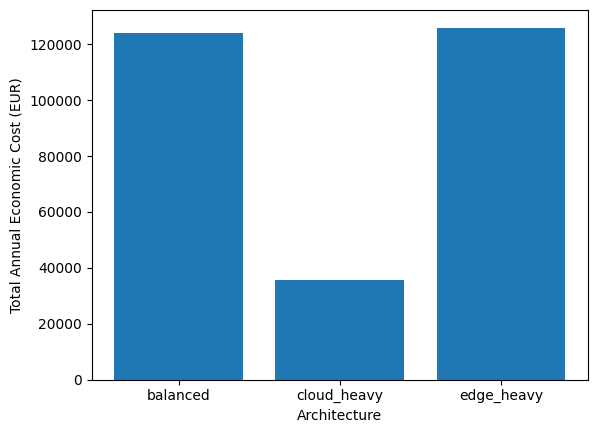

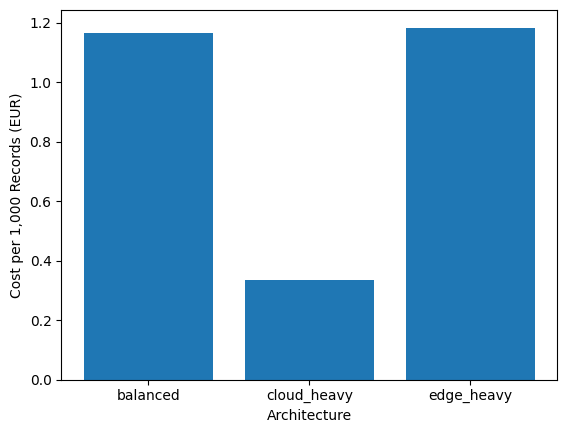

In [16]:
# TODO: create bar charts using matplotlib
plt.bar(agg['architecture'], agg['total_annual_economic_cost_eur'])
plt.xlabel('Architecture')
plt.ylabel('Total Annual Economic Cost (EUR)')

plt.figure()
plt.bar(agg['architecture'], agg['cost_per_1k_records_eur'])
plt.xlabel('Architecture')
plt.ylabel('Cost per 1,000 Records (EUR)')

plt.show()

 **Reflection:** write your discussion here.

 The graph shows that the cloud heavy architecture is the cheapest, with a cost around 35,000 euros per year. The balanced and edge heavy architectures are much more expensive, around 125,000 euros per year. So, we can say that the cloud heavy architecture is clearly the cheapest solution.

If the main objective is reduce costs, the cloud heavy architecture is the best choice. However, this choice is not always perfect as it depends on the mobility of users. The mobility clusters show that most users do not move a lot, but some users move very often and change location many times. For these users, using only the cloud can make more latency and a lower quality of service.

To have a better trade-off between cost and quality of service, some parameters could be changed. For example, we can add some edge or fog nodes only in zones where users move a lot. We can also change how tasks are sent to the cloud or to the edge depending on mobility. This can help to keep a good performance without increasing too much the cost.